<a href="https://colab.research.google.com/github/Ciro125/Alura/blob/main/ML_Pt1_Otimiza%C3%A7%C3%A3o_de_modelos_atraves_de_hiperpar%C3%A2metros_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install graphviz==0.9
!pip install pydot

!apt-get install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [2]:
import pandas as pd
import numpy as np

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns=["Unnamed: 0"], axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,18,35085.22134
1,40557.96,1,20,12622.05362
2,89627.50,0,12,11440.79806
3,95276.14,0,3,43167.32682
4,117384.68,1,4,12770.11290


In [3]:
# situação horrível de "azar" onde as classes estão ordenadas por padrão

dados_azar = dados.sort_values("vendido", ascending=True)
x_azar = dados_azar[["preco", "idade_do_modelo","km_por_ano"]]
y_azar = dados_azar["vendido"]
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


In [4]:
from sklearn.model_selection import cross_validate
from sklearn.dummy import DummyClassifier

SEED = 301
np.random.seed(SEED)

modelo = DummyClassifier()
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com dummy stratified, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com dummy stratified, 10 = [58.00, 58.00]


In [5]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

SEED = 301
np.random.seed(SEED)

modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = 10, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [73.83, 77.73]


In [6]:
# gerando dados elatorios de modelo de carro para simulacao de agrupamento ao usar nosso estimador

np.random.seed(SEED)
dados['modelo'] = dados.idade_do_modelo + np.random.randint(-2, 3, size=10000)
dados.modelo = dados.modelo + abs(dados.modelo.min()) + 1
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,18,35085.22134,18
1,40557.96,1,20,12622.05362,24
2,89627.50,0,12,11440.79806,14
3,95276.14,0,3,43167.32682,6
4,117384.68,1,4,12770.11290,5


In [7]:
def imprime_resultados(results):
  media = results['test_score'].mean() * 100
  desvio = results['test_score'].std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [9]:
# GroupKFold em um pipeline com StandardScaler e SVC

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])

cv = GroupKFold(n_splits = 10)
results = cross_validate(pipeline, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 76.68
Intervalo [74.28, 79.08]


In [10]:
# GroupKFold para analisar como o modelo se comporta com novos grupos

from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=2)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 75.78
Intervalo [73.67, 77.90]


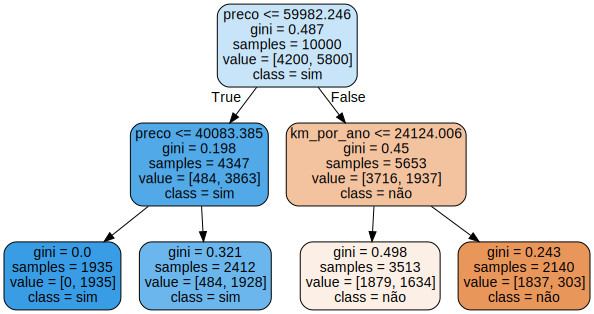

In [11]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, 
                           class_names=["não","sim"], feature_names = features)
graph = graphviz.Source(dot_data)
graph

In [12]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=3)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 78.67
Intervalo [76.40, 80.94]


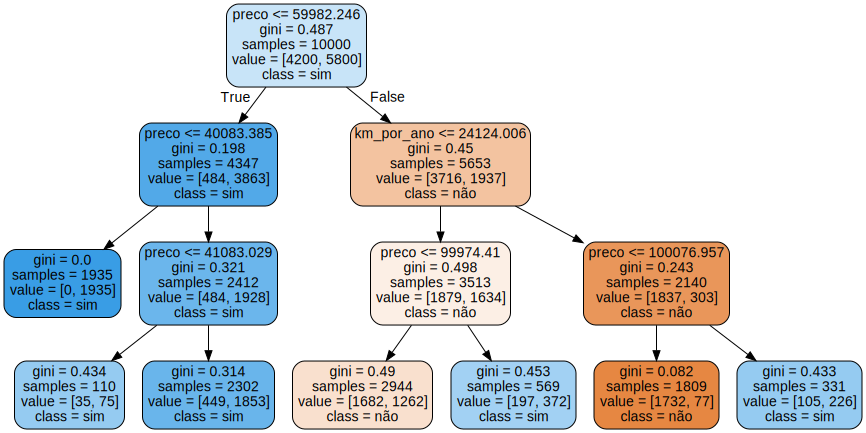

In [13]:
from sklearn.tree import export_graphviz
import graphviz

modelo.fit(x_azar, y_azar)
features = x_azar.columns
dot_data = export_graphviz(modelo, out_file=None, filled=True, rounded=True, 
                           class_names=["não","sim"], feature_names = features)
graph = graphviz.Source(dot_data)
graph

In [14]:
from sklearn.model_selection import GroupKFold

SEED = 301
np.random.seed(SEED)

cv = GroupKFold(n_splits = 10)
modelo = DecisionTreeClassifier(max_depth=10)
results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=False)
imprime_resultados(results)

Accuracy médio 77.19
Intervalo [75.26, 79.13]


# Explorando hiper parâmetros em uma dimensão

In [15]:
def roda_arvore_de_decisao(max_depth):

  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results["train_score"].mean() * 100 
  test_score = results["test_score"].mean() * 100 
  print("Arvore  max_depth = %d, treino = %.2f,  teste = %.2f" % (max_depth, train_score, test_score))
  #imprime_resultados(results)
  tabela = [max_depth,train_score,test_score]
  return tabela

resultados = [roda_arvore_de_decisao(i) for i in range (1,33)]
resultados = pd.DataFrame(resultados, columns = ["max_depth","train_score","test_score"])
resultados.head()

Arvore  max_depth = 1, treino = 75.79,  teste = 75.78
Arvore  max_depth = 2, treino = 75.79,  teste = 75.78
Arvore  max_depth = 3, treino = 78.75,  teste = 78.67
Arvore  max_depth = 4, treino = 78.79,  teste = 78.63
Arvore  max_depth = 5, treino = 78.94,  teste = 78.56
Arvore  max_depth = 6, treino = 79.17,  teste = 78.12
Arvore  max_depth = 7, treino = 79.50,  teste = 77.96
Arvore  max_depth = 8, treino = 79.89,  teste = 77.86
Arvore  max_depth = 9, treino = 80.46,  teste = 77.38
Arvore  max_depth = 10, treino = 81.16,  teste = 77.19
Arvore  max_depth = 11, treino = 82.03,  teste = 76.97
Arvore  max_depth = 12, treino = 82.89,  teste = 76.49
Arvore  max_depth = 13, treino = 83.95,  teste = 75.81
Arvore  max_depth = 14, treino = 85.03,  teste = 75.66
Arvore  max_depth = 15, treino = 86.14,  teste = 75.16
Arvore  max_depth = 16, treino = 87.19,  teste = 75.11
Arvore  max_depth = 17, treino = 88.31,  teste = 74.74
Arvore  max_depth = 18, treino = 89.26,  teste = 74.33
Arvore  max_depth =

,max_depth,train_score,test_score
0,1,75.791169,75.784219
1,2,75.791169,75.784219
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912


<Axes: xlabel='max_depth', ylabel='test_score'>

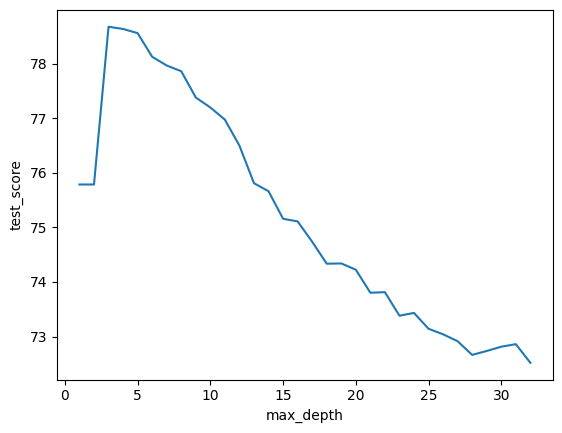

In [16]:
import seaborn as sns

sns.lineplot(x = "max_depth", y = "test_score", data = resultados)

# Overfit - Ficou perfeito para o treino e ruim para o teste. 

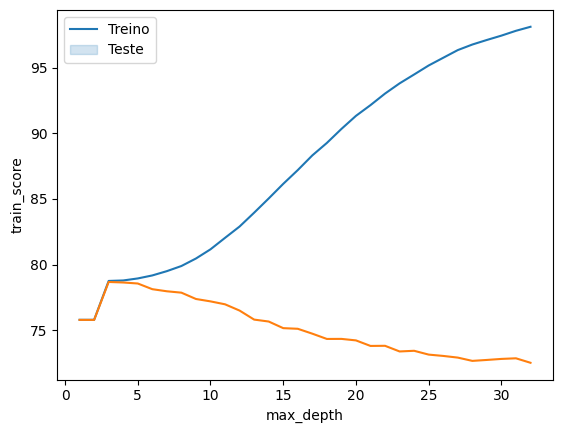

In [17]:
import matplotlib.pyplot as plt


sns.lineplot(x = "max_depth", y = "train_score", data = resultados)
sns.lineplot(x = "max_depth", y = "test_score", data = resultados)
plt.legend(["Treino","Teste"])

In [18]:
resultados.sort_values("test_score", ascending=False).head()

,max_depth,train_score,test_score
2,3,78.750993,78.672633
3,4,78.787628,78.632803
4,5,78.941007,78.555912
5,6,79.170115,78.123266
6,7,79.496806,77.963185


# Explorando hiper parâmetros em uma dimensão

In [19]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf):

  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  train_score = results["train_score"].mean() * 100 
  test_score = results["test_score"].mean() * 100 
  print("Arvore  max_depth = %d, min_samples_leaf = %d treino = %.2f,  teste = %.2f" % (max_depth, min_samples_leaf, train_score, test_score))
  #imprime_resultados(results)
  tabela = [max_depth, min_samples_leaf, train_score, test_score]
  return tabela

def busca():
  resultados = []
  for max_depth in range (1,33):
    for min_samples_leaf in [32,64,128,256]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns = ["max_depth", "min_samples_leaf", "train_score","test_score"])
  return resultados

resultados = busca()
resultados.head()

Arvore  max_depth = 1, min_samples_leaf = 32 treino = 75.79,  teste = 75.78
Arvore  max_depth = 1, min_samples_leaf = 64 treino = 75.79,  teste = 75.78
Arvore  max_depth = 1, min_samples_leaf = 128 treino = 75.79,  teste = 75.78
Arvore  max_depth = 1, min_samples_leaf = 256 treino = 75.79,  teste = 75.78
Arvore  max_depth = 2, min_samples_leaf = 32 treino = 75.79,  teste = 75.78
Arvore  max_depth = 2, min_samples_leaf = 64 treino = 75.79,  teste = 75.78
Arvore  max_depth = 2, min_samples_leaf = 128 treino = 75.79,  teste = 75.78
Arvore  max_depth = 2, min_samples_leaf = 256 treino = 75.79,  teste = 75.78
Arvore  max_depth = 3, min_samples_leaf = 32 treino = 78.75,  teste = 78.67
Arvore  max_depth = 3, min_samples_leaf = 64 treino = 78.75,  teste = 78.67
Arvore  max_depth = 3, min_samples_leaf = 128 treino = 78.75,  teste = 78.67
Arvore  max_depth = 3, min_samples_leaf = 256 treino = 78.75,  teste = 78.67
Arvore  max_depth = 4, min_samples_leaf = 32 treino = 78.75,  teste = 78.67
Arvore

,max_depth,min_samples_leaf,train_score,test_score
0,1,32,75.791169,75.784219
1,1,64,75.791169,75.784219
2,1,128,75.791169,75.784219
3,1,256,75.791169,75.784219
4,2,32,75.791169,75.784219


In [20]:
resultados.sort_values("test_score", ascending=False).head()

,max_depth,min_samples_leaf,train_score,test_score
15,4,256,78.750993,78.672633
12,4,32,78.750993,78.672633
14,4,128,78.750993,78.672633
13,4,64,78.750993,78.672633
8,3,32,78.750993,78.672633


In [22]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,train_score,test_score
max_depth,1.000000e+00,-2.780775e-16,0.536705,-0.027675
min_samples_leaf,-2.780775e-16,1.000000e+00,-0.409676,0.349011
train_score,5.367048e-01,-4.096762e-01,1.000000,0.116466
test_score,-2.767507e-02,3.490111e-01,0.116466,1.000000


<Axes: >

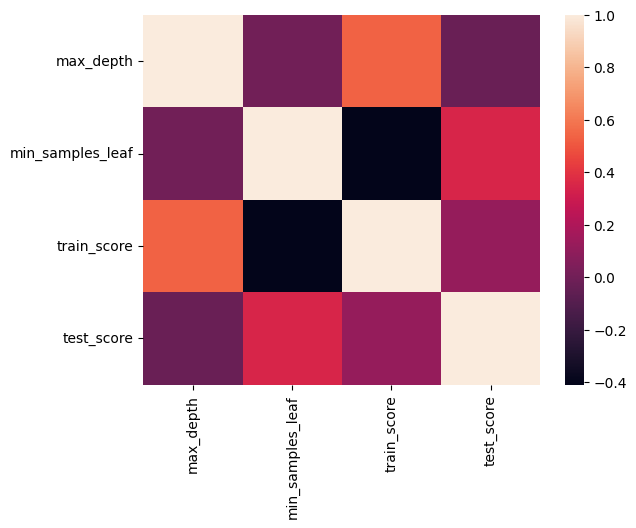

In [23]:
sns.heatmap(corr)

array([[<Axes: xlabel='max_depth', ylabel='max_depth'>,
        <Axes: xlabel='min_samples_leaf', ylabel='max_depth'>,
        <Axes: xlabel='train_score', ylabel='max_depth'>,
        <Axes: xlabel='test_score', ylabel='max_depth'>],
       [<Axes: xlabel='max_depth', ylabel='min_samples_leaf'>,
        <Axes: xlabel='min_samples_leaf', ylabel='min_samples_leaf'>,
        <Axes: xlabel='train_score', ylabel='min_samples_leaf'>,
        <Axes: xlabel='test_score', ylabel='min_samples_leaf'>],
       [<Axes: xlabel='max_depth', ylabel='train_score'>,
        <Axes: xlabel='min_samples_leaf', ylabel='train_score'>,
        <Axes: xlabel='train_score', ylabel='train_score'>,
        <Axes: xlabel='test_score', ylabel='train_score'>],
       [<Axes: xlabel='max_depth', ylabel='test_score'>,
        <Axes: xlabel='min_samples_leaf', ylabel='test_score'>,
        <Axes: xlabel='train_score', ylabel='test_score'>,
        <Axes: xlabel='test_score', ylabel='test_score'>]], dtype=object)

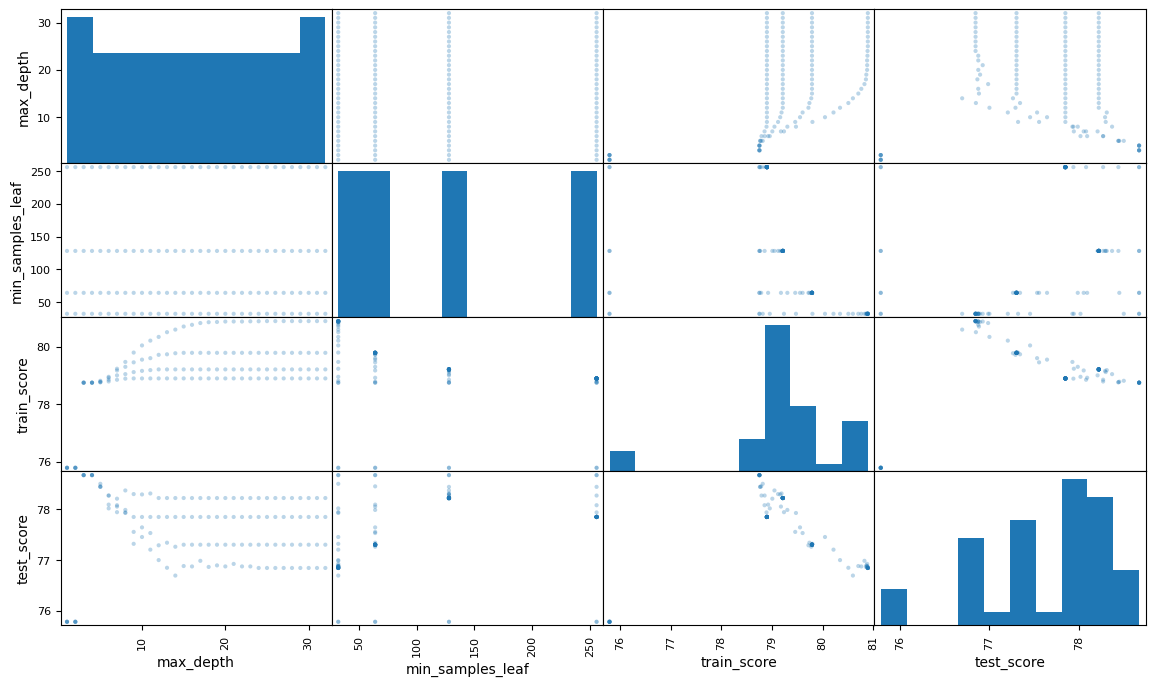

In [28]:
from pandas.plotting import scatter_matrix

pd.plotting.scatter_matrix(resultados, figsize = (14,8), alpha =0.3)

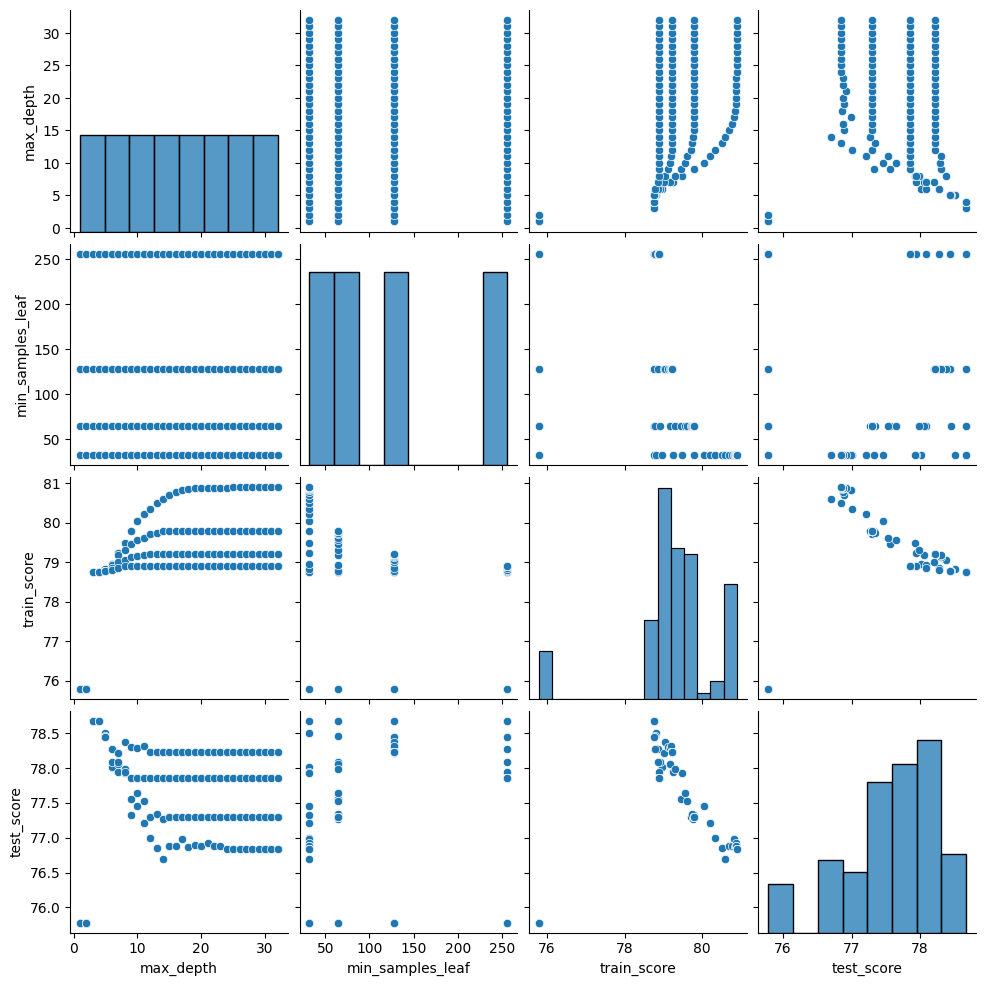

In [30]:
sns.pairplot(resultados)

<Axes: >

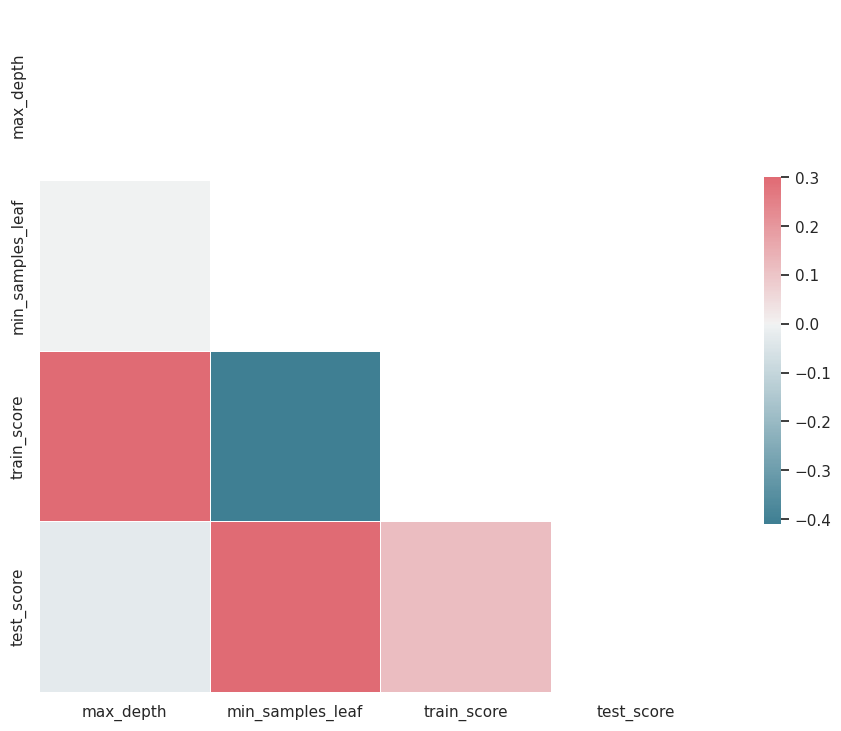

In [32]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [33]:
def busca():
  resultados = []
  for max_depth in range (1,33):
    for min_samples_leaf in [128, 192, 256, 512]:
      tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf)
      resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns = ["max_depth", "min_samples_leaf", "train_score","test_score"])
  return resultados

resultados = busca()
resultados.head()

Arvore  max_depth = 1, min_samples_leaf = 128 treino = 75.79,  teste = 75.78
Arvore  max_depth = 1, min_samples_leaf = 192 treino = 75.79,  teste = 75.78
Arvore  max_depth = 1, min_samples_leaf = 256 treino = 75.79,  teste = 75.78
Arvore  max_depth = 1, min_samples_leaf = 512 treino = 75.79,  teste = 75.78
Arvore  max_depth = 2, min_samples_leaf = 128 treino = 75.79,  teste = 75.78
Arvore  max_depth = 2, min_samples_leaf = 192 treino = 75.79,  teste = 75.78
Arvore  max_depth = 2, min_samples_leaf = 256 treino = 75.79,  teste = 75.78
Arvore  max_depth = 2, min_samples_leaf = 512 treino = 75.79,  teste = 75.78
Arvore  max_depth = 3, min_samples_leaf = 128 treino = 78.75,  teste = 78.67
Arvore  max_depth = 3, min_samples_leaf = 192 treino = 78.75,  teste = 78.67
Arvore  max_depth = 3, min_samples_leaf = 256 treino = 78.75,  teste = 78.67
Arvore  max_depth = 3, min_samples_leaf = 512 treino = 77.53,  teste = 77.50
Arvore  max_depth = 4, min_samples_leaf = 128 treino = 78.75,  teste = 78.67

,max_depth,min_samples_leaf,train_score,test_score
0,1,128,75.791169,75.784219
1,1,192,75.791169,75.784219
2,1,256,75.791169,75.784219
3,1,512,75.791169,75.784219
4,2,128,75.791169,75.784219


In [34]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,train_score,test_score
max_depth,1.000000e+00,6.863211e-17,0.354588,0.240852
min_samples_leaf,6.863211e-17,1.000000e+00,-0.637649,-0.440661
train_score,3.545878e-01,-6.376494e-01,1.000000,0.909222
test_score,2.408525e-01,-4.406611e-01,0.909222,1.000000


<Axes: >

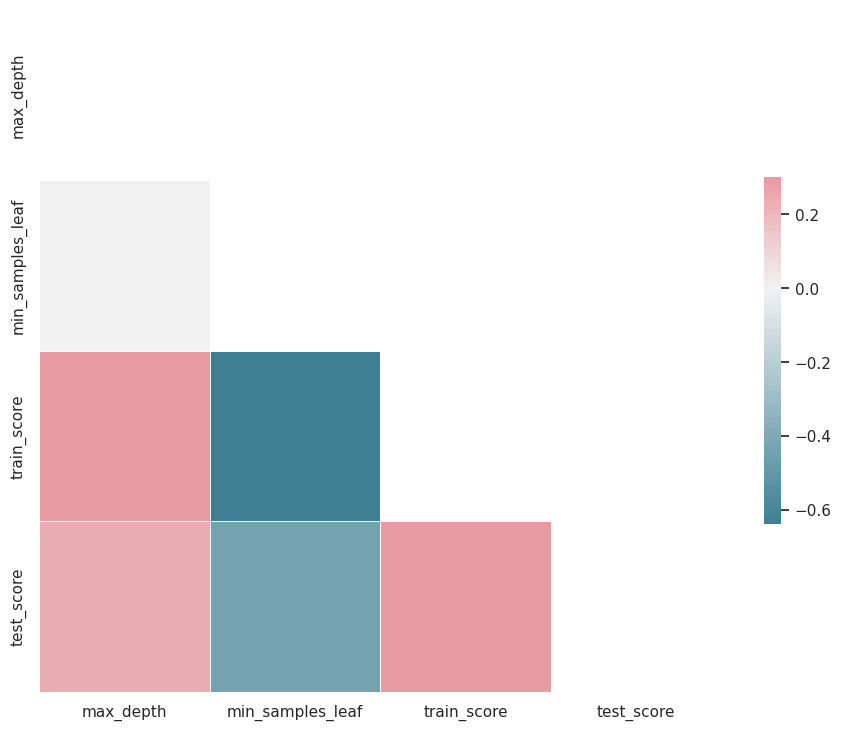

In [35]:
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [37]:
resultados.sort_values("test_score", ascending=False).head()

,max_depth,min_samples_leaf,train_score,test_score
13,4,192,78.750993,78.672633
8,3,128,78.750993,78.672633
9,3,192,78.750993,78.672633
10,3,256,78.750993,78.672633
14,4,256,78.750993,78.672633


# Explorando 3 dimensões de hiperparametros


In [44]:
def roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split):

  SEED = 301
  np.random.seed(SEED)

  cv = GroupKFold(n_splits = 10)
  modelo = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf = min_samples_leaf, min_samples_split=min_samples_split)
  results = cross_validate(modelo, x_azar, y_azar, cv = cv, groups = dados.modelo, return_train_score=True)
  fit_time = results["fit_time"].mean()
  score_time = results["score_time"].mean()
  train_score = results["train_score"].mean() * 100 
  test_score = results["test_score"].mean() * 100 
  #print("Arvore  max_depth = %d, min_samples_leaf = %d, min_samples_split =%d treino = %.2f,  teste = %.2f" % (max_depth, min_samples_leaf, min_samples_split, train_score, test_score))
  #imprime_resultados(results)
  tabela = [max_depth, min_samples_leaf, min_samples_split, train_score, test_score, fit_time, score_time]
  return tabela

def busca():
  resultados = []
  for max_depth in range (1,33):
    for min_samples_leaf in [32,64,128,256]:
      for min_samples_split in [32,64,128,256]:
        tabela = roda_arvore_de_decisao(max_depth, min_samples_leaf, min_samples_split)
        resultados.append(tabela)
  resultados = pd.DataFrame(resultados, columns = ["max_depth", "min_samples_leaf", "min_samples_split", "train_score","test_score", "fit_time", "score_time"])
  return resultados

resultados = busca()
resultados.head()

,max_depth,min_samples_leaf,min_samples_split,train_score,test_score,fit_time,score_time
0,1,32,32,75.791169,75.784219,0.006464,0.002024
1,1,32,64,75.791169,75.784219,0.006043,0.002047
2,1,32,128,75.791169,75.784219,0.006554,0.002129
3,1,32,256,75.791169,75.784219,0.019499,0.009176
4,1,64,32,75.791169,75.784219,0.016179,0.005946


In [45]:
corr = resultados.corr()
corr

,max_depth,min_samples_leaf,min_samples_split,train_score,test_score,fit_time,score_time
max_depth,1.000000e+00,1.300685e-16,4.182375e-16,0.529391,0.011529,0.405541,0.101802
min_samples_leaf,1.300685e-16,1.000000e+00,0.000000e+00,-0.341222,0.286555,-0.377681,-0.110749
min_samples_split,4.182375e-16,0.000000e+00,1.000000e+00,-0.126171,0.132827,-0.062516,0.002670
train_score,5.293913e-01,-3.412220e-01,-1.261715e-01,1.000000,0.247850,0.592017,0.096355
test_score,1.152853e-02,2.865546e-01,1.328271e-01,0.247850,1.000000,-0.034471,-0.003503
fit_time,4.055413e-01,-3.776805e-01,-6.251635e-02,0.592017,-0.034471,1.000000,0.707953
score_time,1.018021e-01,-1.107494e-01,2.669571e-03,0.096355,-0.003503,0.707953,1.000000


<Axes: >

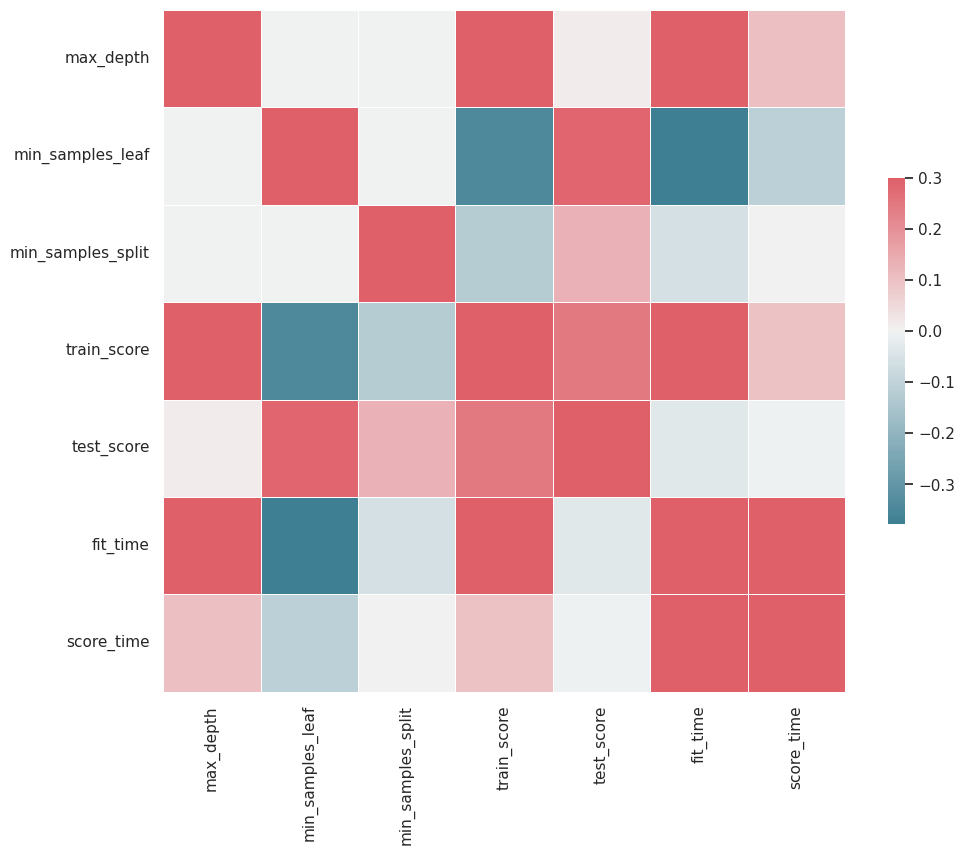

In [46]:
sns.set(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [47]:
resultados.sort_values("test_score", ascending=False).head()

,max_depth,min_samples_leaf,min_samples_split,train_score,test_score,fit_time,score_time
63,4,256,256,78.750993,78.672633,0.012459,0.002303
48,4,32,32,78.750993,78.672633,0.018261,0.003256
34,3,32,128,78.750993,78.672633,0.011110,0.002247
35,3,32,256,78.750993,78.672633,0.010960,0.002321
36,3,64,32,78.750993,78.672633,0.012178,0.002572


# Explorando espaço de hiper parâmetros com GridSearchCV


In [50]:
from sklearn.model_selection import GridSearchCV

SEED = 301
np.random.seed(SEED)

espaço_de_parametros = {
    "max_depth" :[3,5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(),
                     espaço_de_parametros,
                     cv = GroupKFold(n_splits = 10))

busca.fit(x_azar, y_azar, groups = dados.modelo)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.104093,0.014918,0.026964,0.009510,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
1,0.065346,0.028176,0.011780,0.010426,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
2,0.022585,0.009241,0.005183,0.003397,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
3,0.019825,0.006575,0.003556,0.000237,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1
4,0.036155,0.012602,0.009022,0.003893,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.804757,...,0.78408,0.783181,0.797809,0.762866,0.781818,0.77551,0.790262,0.786726,0.011361,1


In [52]:
print(busca.best_params_)
print(busca.best_score_ * 100)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 32, 'min_samples_split': 32}
78.67263337284332


In [53]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

In [54]:
from sklearn.metrics import accuracy_score

# Evitar essa abordagem pois estara sendo otimista

predicoes = melhor.predict(x_azar)
accuracy = accuracy_score(predicoes, y_azar) * 100
print("Accuracy para os dados foi %.2f%%" % accuracy)

Accuracy para os dados foi 78.75%


# Como obter uma estimativa sem esses vicio nos dados que eu ja vi?

No caso de cross validation, com busca de hiper parâmetros, fazemos uma nova validação cruzada. 
Chama-se Nested Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = GroupKFold(n_splits = 10), groups = dados.modelo)

ValueError: ignored

# Infelizmente como o Pandas não suporta nested validation com group k fold, não conseguimos prever o resultado para novos grupos

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

SEED = 301
np.random.seed(SEED)

espaço_de_parametros = {
    "max_depth" :[3,5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

busca = GridSearchCV(DecisionTreeClassifier(),
                     espaço_de_parametros,
                     cv = KFold(n_splits = 5, shuffle = True))

busca.fit(x_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016733,0.004249,0.003994,0.000066,gini,3,32,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
1,0.014393,0.000284,0.003720,0.000134,gini,3,32,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
2,0.017126,0.002985,0.004000,0.000190,gini,3,32,128,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
3,0.042867,0.016943,0.015533,0.009669,gini,3,64,32,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1
4,0.047696,0.025805,0.018473,0.011300,gini,3,64,64,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.784,0.776,0.8025,0.793,0.7795,0.787,0.009618,1


In [59]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(busca, x_azar, y_azar, cv = KFold(n_splits = 5, shuffle = True))
scores

array([0.797 , 0.796 , 0.7735, 0.785 , 0.7825])

In [60]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print("Accuracy médio %.2f" % media)
  print("Intervalo [%.2f, %.2f]" % (media - 2 * desvio, media + 2 * desvio))

In [61]:
imprime_score(scores)

Accuracy médio 78.68
Intervalo [76.92, 80.44]


In [64]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=32, min_samples_split=32)

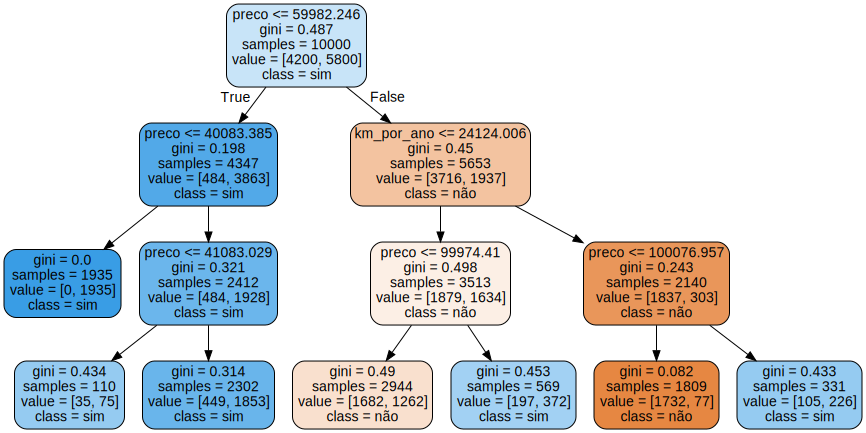

In [65]:
from sklearn.tree import export_graphviz
import graphviz

features = x_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True, 
                           class_names=["não","sim"], feature_names = features)
graph = graphviz.Source(dot_data)
graph